### Exploratory Data Analysis For the RobotSpy Project 

The RobotSpy is a data science dashboard web app. I plan for it to display key statistics for the robotics industry. 



    |--organizations.csv - Organization profiles available on Crunchbase platform
    |--organization_descriptions.csv - Long descriptions for organization profiles
    |--acquisitions.csv - List of all acquisitions available on Crunchbase platform
    |--org_parents.csv - Mapping between parent organizations and subsidaries
    |--ipos.csv - Detail for each IPO in the dataset
    |--category_groups.csv - Mappings between organization categories and category groups
    |--people.csv - People profiles available on Crunchbase platform
    |--people_descriptions.csv - Long descriptions for people profiles
    |--degrees.csv - Detail for people's education background
    |--jobs.csv - List of all job and advisory roles
    |--investors.csv - Active investors, including both organizations and people
    |--investments.csv - All investments made by investors
    |--investment_partners.csv - Partners who are responsible for their firm's investments
    |--funds.csv - Details for investors' investment funds
    |--funding_rounds.csv - Details for each funding round in the dataset
    |--events.csv - Event details
    |--event_appearances.csv - Event participation details
    
The full version of above datafiles could be abtained via Crunchbase's several different services. (1) the Crunchbase Pro service will allow me to export data in excel format according to my search; (2) the Application License will allow me to access the database via its RESTFUL API for my web app. However, I need to check with s sale's rep for the pricing to see whether it's a viable choice for my project at this stage. <br>

This notebook provides some initial exploration of the Crunchbase Open Data Map(ODM) datasets (https://data.crunchbase.com/docs/open-data-map).ODM is a subset of the Crunchbase database.

In [3]:
# importing libraries
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [4]:
# read in data
orgs = pd.read_csv('data/organizations.csv')
ppl = pd.read_csv('data/people.csv')

In [5]:
# what columns have we got
orgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964657 entries, 0 to 964656
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   uuid                    964657 non-null  object
 1   name                    964656 non-null  object
 2   type                    964657 non-null  object
 3   primary_role            964657 non-null  object
 4   cb_url                  964657 non-null  object
 5   domain                  964656 non-null  object
 6   homepage_url            964657 non-null  object
 7   logo_url                964657 non-null  object
 8   facebook_url            548182 non-null  object
 9   twitter_url             517206 non-null  object
 10  linkedin_url            471581 non-null  object
 11  combined_stock_symbols  31608 non-null   object
 12  city                    807740 non-null  object
 13  region                  807740 non-null  object
 14  country_code            807740 non-n

In [9]:
# Let's take a first look at the data
orgs.head(3)

,uuid,name,type,primary_role,cb_url,domain,homepage_url,logo_url,facebook_url,twitter_url,linkedin_url,combined_stock_symbols,city,region,country_code,short_description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,company,https://www.crunchbase.com/organization/wetpai...,wetpaint.com,http://www.wetpaint.com/,https://crunchbase-production-res.cloudinary.c...,https://www.facebook.com/Wetpaint,https://twitter.com/wetpainttv,https://www.linkedin.com/company/wetpaint,NaN,New York,New York,USA,Wetpaint offers an online social publishing pl...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,company,https://www.crunchbase.com/organization/zoho?u...,zoho.com,https://www.zoho.com/,https://crunchbase-production-res.cloudinary.c...,http://www.facebook.com/zoho,http://twitter.com/zoho,http://www.linkedin.com/company/zoho-corporati...,NaN,Pleasanton,California,USA,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,company,https://www.crunchbase.com/organization/digg?u...,digg.com,http://www.digg.com,https://crunchbase-production-res.cloudinary.c...,http://www.facebook.com/digg,http://twitter.com/digg,http://www.linkedin.com/company/digg,NaN,New York,New York,USA,Digg Inc. operates a website that enables its ...


In [7]:
# Explore the 'type' column 
# Note: It shows that in the ODM dataset all the records' type are 'organization'
orgs.type.value_counts()

organization    964657
Name: type, dtype: int64

In [10]:
# Explore the 'primary_role' column 
orgs.primary_role.value_counts()

company     958464
investor      5950
school         243
Name: primary_role, dtype: int64

In [15]:
# Explore the 'country' column 
# Note : 212 different country codes: there must be duplicates; 
# however, I probablly will focus on major countries.
orgs.country_code.value_counts()

USA    326193
GBR     67949
IND     44446
DEU     35538
CAN     35080
        ...  
SLB         1
MAF         1
COK         1
BLM         1
NFK         1
Name: country_code, Length: 212, dtype: int64

In [17]:
# Explore the 'region' column 
orgs.region.value_counts()

California                  78803
New York                    35549
England                     26741
Texas                       22019
Florida                     18684
                            ...  
Flacq                           1
Taza-Al Hoceima-Taounate        1
Trat                            1
Tacloban                        1
Laane-Virumaa                   1
Name: region, Length: 1927, dtype: int64

In [11]:
# Explore the 'city' column 
orgs.city.value_counts()

London           27030
New York         23954
San Francisco    16342
Tokyo             9468
Toronto           8281
                 ...  
Garstedt             1
King William         1
Herlufmagle          1
Saint-lyphard        1
Walcha               1
Name: city, Length: 36325, dtype: int64

In [23]:
df = orgs[['uuid','name', 'primary_role','logo_url',\
           'combined_stock_symbols','city','region','country_code','short_description']]

<AxesSubplot:>

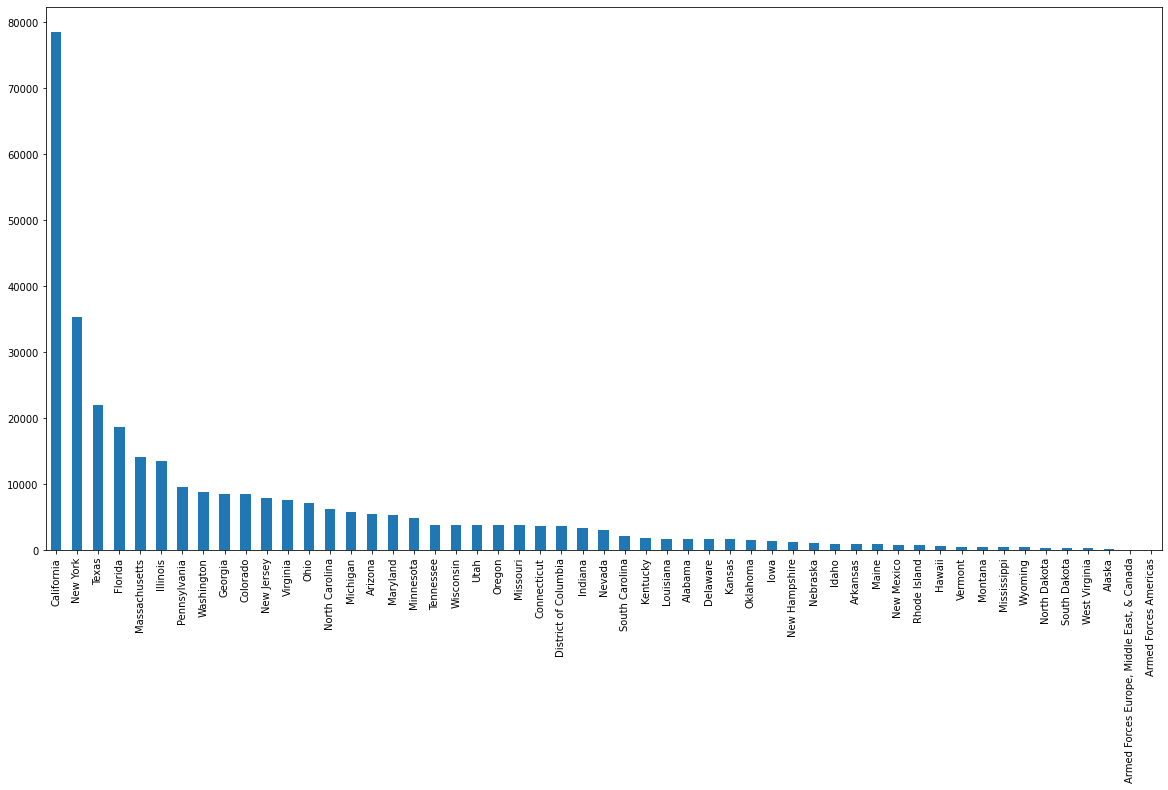

In [25]:
plt.figure(figsize=(20,10))
df[(df.country_code=='USA') & (df.primary_role=="company")].region.value_counts().plot(kind='bar')

<AxesSubplot:>

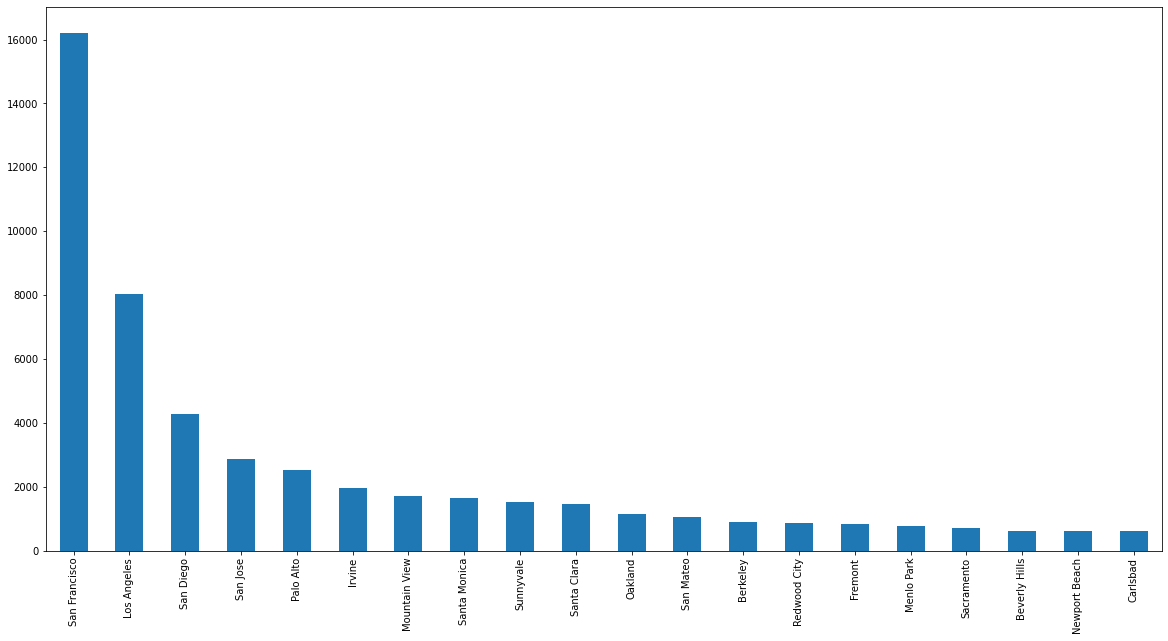

In [33]:
plt.figure(figsize=(20,10))
df[(df.country_code=='USA') & (df.primary_role=="company") & (df.region=='California')]\
            .city.value_counts()[:20].plot(kind='bar')

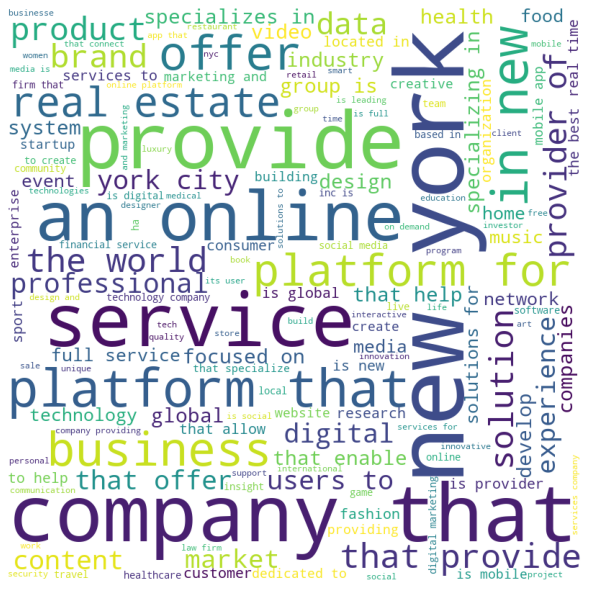

<Figure size 432x288 with 0 Axes>

In [35]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df[(df.country_code=='USA') & (df.primary_role=="company") & (df.city=='New York')].short_description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
plt.savefig('sample')
wordcloud.to_file('sample.png')